<a href="https://colab.research.google.com/github/milomalas/ohayou-sekai/blob/main/statistika/HDF_NetCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h3>Langkah-langkah secara garis besarnya</h3>**

1. Buka data sehingga bisa dimanipulasi
2. Persiapan:
  - Siapkan datanya
  - Siapkan grid koordinat lat lon yang spesifikasinya sesuai datanya
3. Plot :
  - Bikin petanya
  - Gambar (plot) data di atas peta
  - Tambahkan fitur-fitur peta (*opsional*)
4. Cek, selesai.

# Buka Drive & Package

Cartopy mesti diinstall dulu.
> Shapely mesti diupgrade atau diinstall ulang supaya Cartopy gak crash.

Pyhdf mesti diinstall dulu
> Numpy mesti diupgrade dulu karena Pyhdf minta upgrade.
> > Bakal ada warning dan mesti restart runtime 1 kali.

Tadi nyoba h5py sebagai alternatif Pyhdf tapi nampaknya dia gagal membuka file HDFnya :
```
OSError: Unable to open file (file signature not found)
```

### Install package untuk buka HDF

Kalau gamau buka file HDF di skip aja ini

In [ ]:
!pip install pyhdf
!pip install --upgrade numpy
from pyhdf.SD import SD, SDC

Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.3)


In [ ]:
### Untuk buka HDF
#import h5py as h5py       # HDF error, katanya mungkin filenya corrupt
from pyhdf.SD import SD, SDC
import numpy as np

### Package lain (NetCDF dan Cartopy)
Yang ini jangan di skip

In [ ]:
# Di colab hrus install ulang Cartopy, tapi kalau mo di Anaconda keknya gausah
!pip install cartopy
!pip install --no-binary shapely shapely --force
import cartopy.crs as ccrs
import cartopy.feature as cftr

  Using cached https://files.pythonhosted.org/packages/42/f3/0e1bc2c4f15e05e30c6b99322b9ddaa2babb3f43bc7df2698efdc1553439/Shapely-1.7.1.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1
    Running setup.py install for shapely ... done


In [ ]:
### Untuk buka NetCDF
import netCDF4 as nc
import xarray as xr

import numpy as np

### Untuk plot peta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cftr

In [ ]:
# Otorisasi akses Drive
from google.colab import drive
drive.mount('/content/drive/')

!ls 'drive/MyDrive/Colab Notebooks/Folder HDF Fenny/'

# Alamat
file_hdf = 'drive/MyDrive/Colab Notebooks/Folder HDF Fenny/3B43.19980201.7.HDF'
file_nc  = 'drive/MyDrive/Colab Notebooks/Folder HDF Fenny/3B43.19980101.7.HDF.nc4'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
3B43.19980101.7.HDF.nc4  3B43.19980201.7.HDF  883202_README.TRMM_V7.pdf


# Membaca HDF

HDF tidak mengandung informasi spesifikasi data seperti koordinat gtgt jadi harus kita tau sendiri
> Kelemahan: kalau salah spesifikasi data, bakal salah juga plotnya.

## h5py (*fail*)


Bilangnya:
```
---------------------------------------------------------------------------

OSError                                   Traceback (most recent call last)

<ipython-input-10-daf1f1acc11b> in <module>()
      1 # Package h5py
----> 2 h_hdf = h5py.File(file_hdf, 'r')
      3 h_hdf

1 frames

/usr/local/lib/python3.7/dist-packages/h5py/_hl/files.py in make_fid(name, mode, userblock_size, fapl, fcpl, swmr)
    188         if swmr and swmr_support:
    189             flags |= h5f.ACC_SWMR_READ
--> 190         fid = h5f.open(name, flags, fapl=fapl)
    191     elif mode == 'r+':
    192         fid = h5f.open(name, h5f.ACC_RDWR, fapl=fapl)

h5py/_objects.pyx in h5py._objects.with_phil.wrapper()

h5py/_objects.pyx in h5py._objects.with_phil.wrapper()

h5py/h5f.pyx in h5py.h5f.open()

OSError: Unable to open file (file signature not found)
```

In [ ]:
# Buka pakai package h5py
h_hdf = h5py.File(file_hdf, 'r')
h_hdf 

OSError: ignored

## pyhdf

In [ ]:
# Buka pakai package pyhdf
p_hdf = SD(file_hdf, SDC.READ)
p_hdf

In [ ]:
# Ekstrak data
precip = p_hdf.select('precipitation')
precip = np.transpose(precip[:])
precip.shape

# Set all the missing valuse less than 0 to NaNs
np.putmask(precip, precip<0, np.nan)

In [ ]:
print((0.25*399) + (-49.875)) #lat
print((0.25*1439) + (-179.875)) # lon

49.875
179.875


### **Plot Peta**

[Maps with Cartopy - Research Computing in Earth Sciences
](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)


[How do I change matplotlib's subplot projection of an existing axis?](https://stackoverflow.com/questions/33942233/how-do-i-change-matplotlibs-subplot-projection-of-an-existing-axis)


[Cartopy map gridlines and tick labels](https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html)

[The cartopy Feature interface¶](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html)

`ax.set_extent` : Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.
> x0 : kiri, x1 : kanan, \
> y0 : bawah, y1 : atas

Sesuaikan `pad`, `shrink`, dan `aspect` dari cbarnya.

g_lat.shape: (400,) 
g_lon.shape: (1440,)
grid.shape: (400, 1440) (400, 1440)


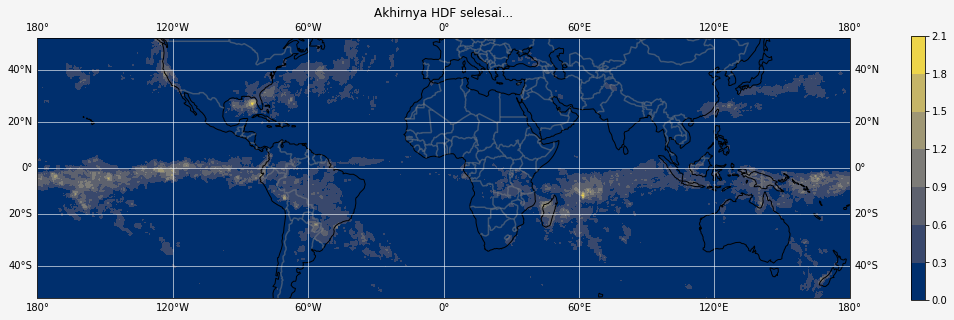

In [ ]:
# Latitude, longitude
g_lat = np.arange(-49.875, 50, 0.25)
g_lon = np.arange(-179.875, 180, 0.25)
print("g_lat.shape:", g_lat.shape, "\ng_lon.shape:", g_lon.shape)

  # Grid lat lon
x, y = np.float32(np.meshgrid(g_lon, g_lat))
print("grid.shape:", x.shape, y.shape)

# Batas-batas peta (extent)
loncorners = [-180,180]
latcorners = [-50, 50]


###############################################################################

# Cartopy: Bikin figure `fig` (kanvas) & geoAxes `m` (sumbu tapi data geografis)
fig = plt.figure(figsize=(15,15))
m = plt.axes(projection= ccrs.Mercator())

m.set_extent([loncorners[0],  # x0
              loncorners[1],  # x1
              latcorners[0],  # y0
              latcorners[1]], # y1
             crs = ccrs.PlateCarree() # PENTING tampaknya proyeksi Mercator bukan derajat satuannya.
             )

# Plot
  # Skala colorbar
#clevs = np.arange(0, 1.01, 0.5)
clevs = 6

  # Gambar plot
kontur = m.contourf(x, y, precip, 
                    levels = clevs,
                    cmap = 'cividis',
                    transform= ccrs.PlateCarree() # PENTING karena x y kita derajat, sedangkan proyeksi petanya Mercator
                    )

  # Gambar colorbar
fig.colorbar(kontur, shrink=0.25, aspect=20, pad=0.06)


# Cartopy : gambar-gambar fitur
  # Batas negara, provinsi, laut, danau, sungai, dkk pakai cartopy.features
m.coastlines()
m.gridlines(draw_labels=True, alpha=0.75, ls='--', color='white')
m.add_feature(cftr.BORDERS, alpha=0.5, lw=1.5, edgecolor='grey')


# Selesai
fig.patch.set_facecolor('whitesmoke') # pen ganti warna bg plot
plt.title("Akhirnya HDF selesai...")
plt.tight_layout()
plt.show()

### **Plot Peta</h3>**  tapi extentnya diganti.

Tinggal ganti di extentnya (`set_extent` <-- `latcorners` dan `loncorners`)

g_lat.shape: (400,) 
g_lon.shape: (1440,)
grid.shape: (400, 1440) (400, 1440)


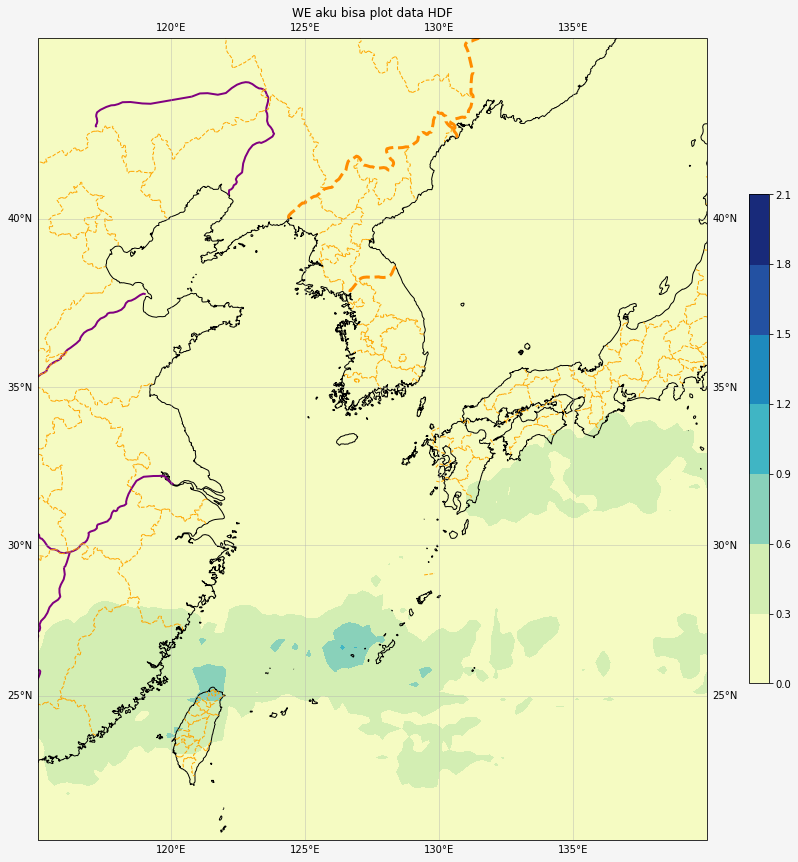

In [ ]:
# Latitude, longitude
g_lat = np.arange(-49.875, 50, 0.25)
g_lon = np.arange(-179.875, 180, 0.25)
print("g_lat.shape:", g_lat.shape, "\ng_lon.shape:", g_lon.shape)

  # Grid lat lon
x, y = np.float32(np.meshgrid(g_lon, g_lat))
print("grid.shape:", x.shape, y.shape)

# Batas-batas peta (extent)
loncorners = [115,140]
latcorners = [20, 45]


###############################################################################

# Cartopy: Bikin figure `fig` (kanvas) & geoAxes `m` (sumbu tapi data geografis)
fig = plt.figure(figsize=(15,15))
m = plt.axes(projection= ccrs.Mercator())

m.set_extent([loncorners[0],  # x0
              loncorners[1],  # x1
              latcorners[0],  # y0
              latcorners[1]], # y1
             crs = ccrs.PlateCarree() # PENTING tampaknya proyeksi Mercator bukan derajat satuannya.
             )

# Plot
  # Skala colorbar
#clevs = np.arange(0, 1.01, 0.5)
clevs = 6

  # Gambar plot
kontur = m.contourf(x, y, precip, 
                    levels = clevs,
                    cmap = 'YlGnBu',
                    transform= ccrs.PlateCarree() # PENTING karena x y kita derajat, sedangkan proyeksi petanya Mercator
                    )

  # Gambar colorbar
fig.colorbar(kontur, shrink=0.6, aspect=25, pad=0.05)


# Cartopy : gambar-gambar fitur
m.coastlines(resolution='10m')
m.gridlines(draw_labels=True, alpha=0.5, ls=':')

  # Batas negara, provinsi, laut, danau, sungai, dkk pakai cartopy.features
m.add_feature(cftr.BORDERS, edgecolor='darkorange', lw=3, ls='--')
m.add_feature(cftr.RIVERS, edgecolor='purple', lw=2)

subdiv = cftr.NaturalEarthFeature(category='cultural',
                                  name='admin_1_states_provinces_lines',
                                  scale='10m', facecolor='none')

m.add_feature(subdiv, lw=1, ls='--', edgecolor='orange')


# Selesai
fig.patch.set_facecolor('whitesmoke') # pen ganti warna bg plot
plt.title("WE aku bisa plot data HDF")
plt.show()

### **Peta Proyeksi Lain**

[Cartopy projection list](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html)

Ubah di `projection=ccrs.proyeksi_peta()` nya, perhatikan pengaruh `set_extent()`

g_lat.shape: (400,) 
g_lon.shape: (1440,)
grid.shape: (400, 1440) (400, 1440)


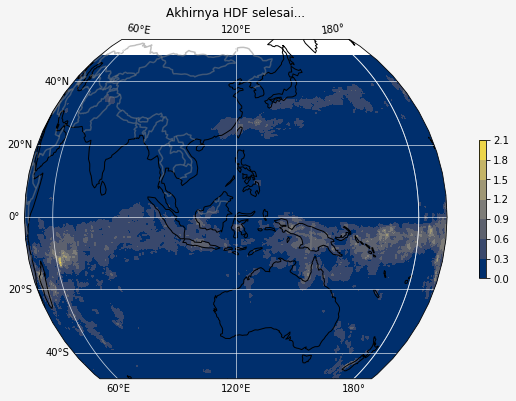

In [ ]:
# Latitude, longitude
g_lat = np.arange(-49.875, 50, 0.25)
g_lon = np.arange(-179.875, 180, 0.25)
print("g_lat.shape:", g_lat.shape, "\ng_lon.shape:", g_lon.shape)

  # Grid lat lon
x, y = np.float32(np.meshgrid(g_lon, g_lat))
print("grid.shape:", x.shape, y.shape)

# Batas-batas peta (extent)
loncorners = [-180,180]
latcorners = [-90, 90]


###############################################################################

# Cartopy: Bikin figure `fig` (kanvas) & geoAxes `m` (sumbu tapi data geografis)
fig = plt.figure(figsize=(8,8))
m = plt.axes(projection= ccrs.Orthographic(central_latitude=0, 
                                           central_longitude=120))

#m.set_extent(
#    [loncorners[0],  # x0
#     loncorners[1],  # x1
#     latcorners[0],  # y0
#     latcorners[1]], # y1
#     crs = ccrs.PlateCarree() # PENTING proyeksi peta belum tentu sama dengan proyeksi derajat kita. 
#     )

# Plot
  # Skala colorbar
#clevs = np.arange(0, 1.01, 0.5)
clevs = 6

  # Gambar plot
kontur = m.contourf(x, y, precip, 
                    levels = clevs,
                    cmap = 'cividis',
                    transform= ccrs.PlateCarree() # PENTING karena x y kita derajat, sedangkan proyeksi petanya Mercator
                    )

  # Gambar colorbar
fig.colorbar(kontur, shrink=0.25, aspect=20, pad=0.06)


# Cartopy : gambar-gambar fitur
  # Batas negara, provinsi, laut, danau, sungai, dkk pakai cartopy.features
m.coastlines()
m.gridlines(draw_labels=True, alpha=0.75, ls='--', color='white')
m.add_feature(cftr.BORDERS, alpha=0.5, lw=1.5, edgecolor='grey')


# Selesai
fig.patch.set_facecolor('whitesmoke') # pen ganti warna bg plot
plt.title("Akhirnya HDF selesai...")
plt.tight_layout()
plt.show()

# Membaca NetCDF

Hai Khusna

## Xarray (NetCDF4)

Xarray memudahkan karena fitur-fiturnya langsung bundle variabel dengan lat-lonnya + fitur seperti Numpy (bisa manipulasi array) dan fitur seperti Pandas (bisa group, sel, dkk dkk) *dah mantaplah pokoknya*

In [ ]:
# Buka pakai package Xarray dengan engine dari package NetCDF4 (implisit)
# Jadi tetap hrus import NetCDF4
nc_xr = xr.open_dataset(file_nc).transpose()
nc_xr

# Langsung bisa diplot dan dipotong dan lainnya
# Transpose karena lat lon bukan lon lat (cuma ngaruh ke plotting jadinya lon di y lat di x)

<xarray.Dataset>
Dimensions:                 (nlat: 400, nlon: 1440)
Coordinates:
  * nlon                    (nlon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nlat                    (nlat) float32 -49.88 -49.62 -49.38 ... 49.62 49.88
Data variables:
    precipitation           (nlat, nlon) float32 ...
    relativeError           (nlat, nlon) float32 ...
    gaugeRelativeWeighting  (nlat, nlon) int32 ...
Attributes:
    Grid.GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatit...
    FileHeader:       AlgorithmID=3B43;\nAlgorithmVersion=3B43_7.0;\nFileName...
    FileInfo:         DataFormatVersion=m;\nTKCodeBuildVersion=1;\nMetadataVe...
    GridHeader:       BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatit...
    history:          2021-02-02 09:01:45 GMT Hyrax-1.15.4 https://disc2.gesd...

In [ ]:
print(nc_xr.coords,"\n\n", nc_xr.info)

Coordinates:
  * nlon     (nlon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * nlat     (nlat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88 

 <bound method Dataset.info of <xarray.Dataset>
Dimensions:                 (nlat: 400, nlon: 1440)
Coordinates:
  * nlon                    (nlon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nlat                    (nlat) float32 -49.88 -49.62 -49.38 ... 49.62 49.88
Data variables:
    precipitation           (nlat, nlon) float32 ...
    relativeError           (nlat, nlon) float32 ...
    gaugeRelativeWeighting  (nlat, nlon) int32 ...
Attributes:
    Grid.GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatit...
    FileHeader:       AlgorithmID=3B43;\nAlgorithmVersion=3B43_7.0;\nFileName...
    FileInfo:         DataFormatVersion=m;\nTKCodeBuildVersion=1;\nMetadataVe...
    GridHeader:       BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatit...
    history:          2021-02-02 09:01:45 GMT H

### **Plot langsung**

[Plotting - xarray](http://xarray.pydata.org/en/stable/user-guide/plotting.html)

Buat visualisasi cepat. Data berupa pixel dan bukan kontur.
```
Dataset.variable.plot()
```

**Kalau datanya ada dimensi waktu** (a.k.a. `[time, lat, lon]` maka harus pilih 1 waktu dulu supaya dapat peta `[lat, lon]`)

```
Dataset.variabel.sel(<dimensi_waktu> = <kapan>, method='nearest').plot()
```
Cari tahu nama dimensi dengan `Dataset.dims()` 

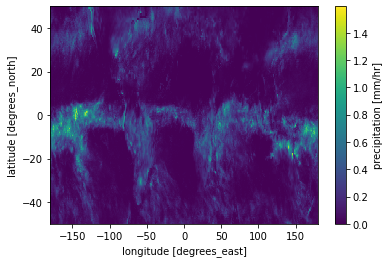

In [ ]:
# All-otomatis

nc_xr.precipitation.plot(); plt.show()

In [ ]:
# HEHEHE (mo ganti font plot Matplotlibnya hehehe)
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip'
!unzip 'NotoSansCJKjp-hinted.zip'
!mv NotoSansCJKjp-Medium.otf /usr/share/fonts/truetype/

import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/NotoSansCJKjp-Medium.otf'
fontprop = fm.FontProperties(fname=path)

--2021-06-13 12:52:04--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.214.128, 2607:f8b0:400c:c0b::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121096772 (115M) [application/zip]
Saving to: ‘NotoSansCJKjp-hinted.zip.2’

NotoSansCJKjp-hinte 100%[===================>] 115.49M   216MB/s    in 0.5s    

2021-06-13 12:52:04 (216 MB/s) - ‘NotoSansCJKjp-hinted.zip.2’ saved [121096772/121096772]

Archive:  NotoSansCJKjp-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: NotoSansCJKjp-Medium.otf  


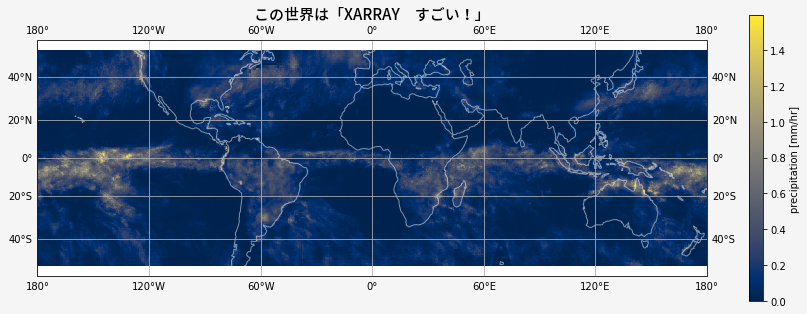

In [ ]:
# Tentukan figure/axes sendiri

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Mercator())
nc_xr.precipitation.plot(ax=ax, 
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'shrink':0.35},
                         cmap = 'cividis'
                         )
ax.coastlines(color='white', alpha=0.5)
ax.gridlines(draw_labels=True, lw=1.5)
plt.title("この世界は「XARRAY　すごい！」", fontproperties=fontprop, fontsize=15)
fig.patch.set_facecolor('whitesmoke') # pen ganti warna bg plot
plt.show()

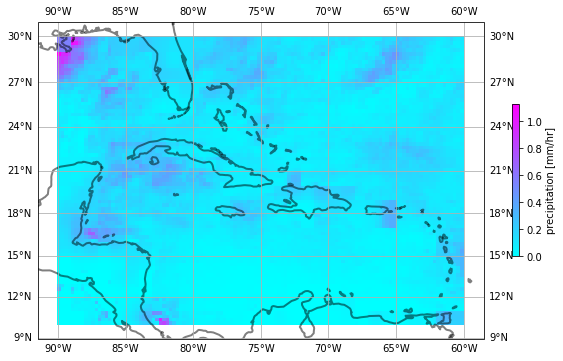

In [ ]:
# Select: pilih variabel, pilih koordinat

yangdipilih = nc_xr.precipitation.sel(nlon=slice(-90, -60), 
                                      nlat=slice(10, 30),
                                      )

plt.figure(figsize=(10,7))
ax = plt.axes(projection=ccrs.Mercator())
yangdipilih.plot(ax=ax, 
                 transform=ccrs.PlateCarree(),
                 cbar_kwargs={'shrink':0.4},
                 cmap = 'cool'
                 )
ax.coastlines(color='black', lw=2, alpha=0.5)
ax.gridlines(draw_labels=True)
plt.show()

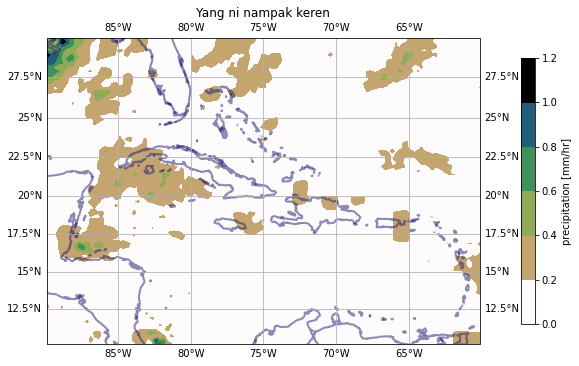

In [ ]:
# Bikin plot filled-contour (contourf)

yangdipilih = nc_xr.precipitation.sel(nlon=slice(-90, -60), 
                                      nlat=slice(10, 30),
                                      )

plt.figure(figsize=(10,7))
ax = plt.axes(projection=ccrs.Mercator())
yangdipilih.plot.contourf(ax=ax, 
                          transform=ccrs.PlateCarree(),
                          cbar_kwargs={'shrink':0.7, 'pad':0.075},
                          cmap = 'gist_earth_r'
                          )
ax.coastlines(resolution='10m', color='midnightblue', lw=2, alpha=0.5)
ax.gridlines(draw_labels=True)
plt.title("Yang ni nampak keren")
plt.show()

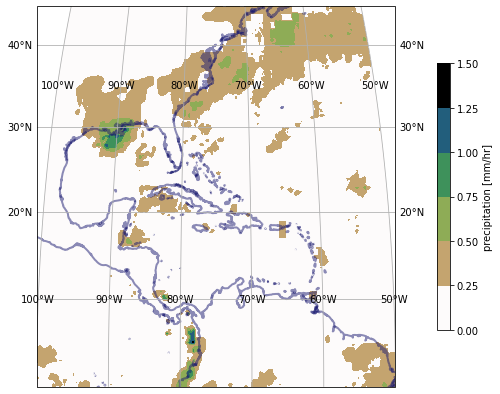

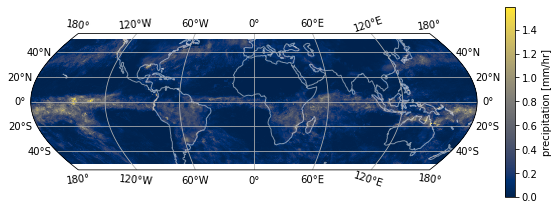

In [ ]:
# Bikin plot Mollweide

yangdipilih = nc_xr.precipitation.sel(nlon=slice(-100, -50), 
                                      nlat=slice(0, 45),
                                      )

plt.figure(figsize=(10,7))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-75))
yangdipilih.plot.contourf(ax=ax, 
                          transform=ccrs.PlateCarree(),
                          cbar_kwargs={'shrink':0.7, 'pad':0.075},
                          cmap = 'gist_earth_r'
                          )
ax.coastlines(resolution='10m', color='midnightblue', lw=2, alpha=0.5)
ax.gridlines(draw_labels=True)
plt.show()

################################################################################

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.EckertV())
nc_xr.precipitation.plot(ax=ax, 
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'shrink':0.35},
                         cmap = 'cividis'
                         )
ax.coastlines(color='white', alpha=0.5)
ax.gridlines(draw_labels=True, lw=1.5)
plt.show()

### **Plot manual dengan ekstrak data**
Data dikeluarkan jadi array macam di HDF tadi. Kubilang kek sayang sih menyia-nyiakan fitur heuheuehue tapi manatau situasi memang bisanya begini (mungkin karena mau dimanipulasi dulu)

tipe: <class 'xarray.core.dataarray.DataArray'>


<xarray.DataArray 'precipitation' (nlat: 400, nlon: 1440)>
[576000 values with dtype=float32]
Coordinates:
  * nlon     (nlon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * nlat     (nlat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
Attributes:
    units:    mm/hr

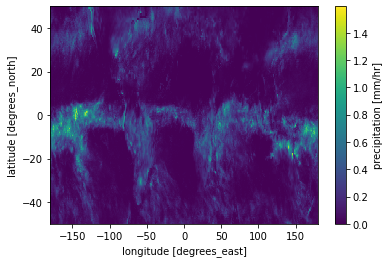

In [ ]:
# Tinggal variabel dari dataset xarraynya dicopy keluar

nc_precip = nc_xr.precipitation   # jadi DataArray (dataset dengan 1 variabel saja)
print("tipe:", type(nc_precip))
nc_precip.plot()
nc_precip

tipe: <class 'numpy.ndarray'>
g_lat.shape: (400,) 
g_lon.shape: (1440,)
grid.shape: (400, 1440) (400, 1440)


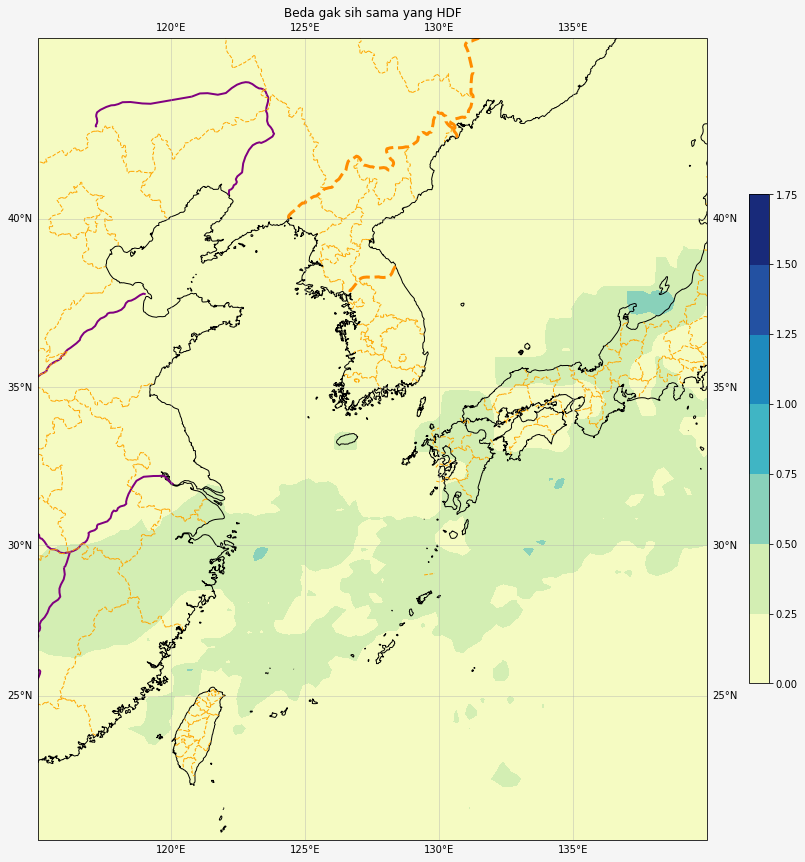

In [ ]:
nc_precip = nc_xr.precipitation.values   # jadi array numpy biasa (koordinat hilang)
print("tipe:", type(nc_precip))
nc_precip

# Perlakukan seperti array biasa, berarti plot manual seperti di HDF
# Ni aku cuma copas, baru ganti latlon dan ganti variabel di contourf()
###############################################################################

# Latitude, longitude
  # Daripada tentukan sendiri mending ambil dari Dataset biar gak salah
g_lat = nc_xr.nlat.values
g_lon = nc_xr.nlon.values
print("g_lat.shape:", g_lat.shape, "\ng_lon.shape:", g_lon.shape)

  # Grid lat lon
x, y = np.float32(np.meshgrid(g_lon, g_lat))
print("grid.shape:", x.shape, y.shape)

# Batas-batas peta (extent)
loncorners = [115,140]
latcorners = [20, 45]


###############################################################################

# Cartopy: Bikin figure `fig` (kanvas) & geoAxes `m` (sumbu tapi data geografis)
fig = plt.figure(figsize=(15,15))
m = plt.axes(projection= ccrs.Mercator())

m.set_extent([loncorners[0],  # x0
              loncorners[1],  # x1
              latcorners[0],  # y0
              latcorners[1]], # y1
             crs = ccrs.PlateCarree() # PENTING tampaknya proyeksi Mercator bukan derajat satuannya.
             )

# Plot
  # Skala colorbar
#clevs = np.arange(0, 1.01, 0.5)
clevs = 6

  # Gambar plot
kontur = m.contourf(x, y, nc_precip, 
                    levels = clevs,
                    cmap = 'YlGnBu',
                    transform= ccrs.PlateCarree() # PENTING karena x y kita derajat, sedangkan proyeksi petanya Mercator
                    )

  # Gambar colorbar
fig.colorbar(kontur, shrink=0.6, aspect=25, pad=0.05)


# Cartopy : gambar-gambar fitur
m.coastlines(resolution='10m')
m.gridlines(draw_labels=True, alpha=0.5, ls=':')

  # Batas negara, provinsi, laut, danau, sungai, dkk pakai cartopy.features
m.add_feature(cftr.BORDERS, edgecolor='darkorange', lw=3, ls='--')
m.add_feature(cftr.RIVERS, edgecolor='purple', lw=2)

subdiv = cftr.NaturalEarthFeature(category='cultural',
                                  name='admin_1_states_provinces_lines',
                                  scale='10m', facecolor='none')

m.add_feature(subdiv, lw=1, ls='--', edgecolor='orange')


# Selesai
fig.patch.set_facecolor('whitesmoke') # pen ganti warna bg plot
plt.title("Beda gak sih sama yang HDF")
plt.show()

# Perbandingan

Kok beda ya hmmmm mungkin aku typo masukkan lat lonnya, atau levelsnya beda ya

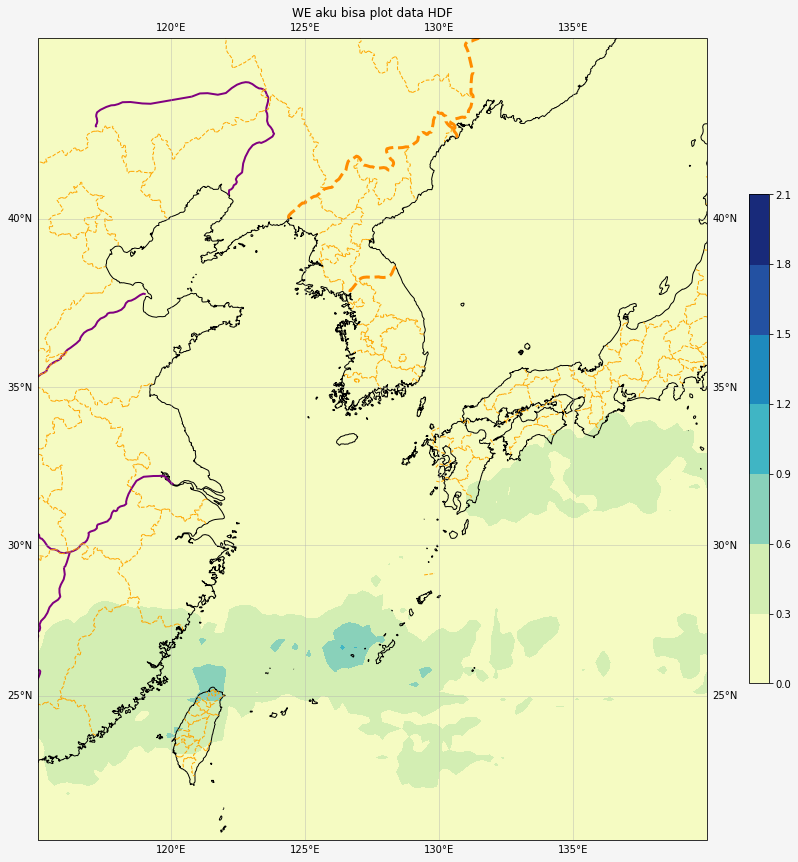

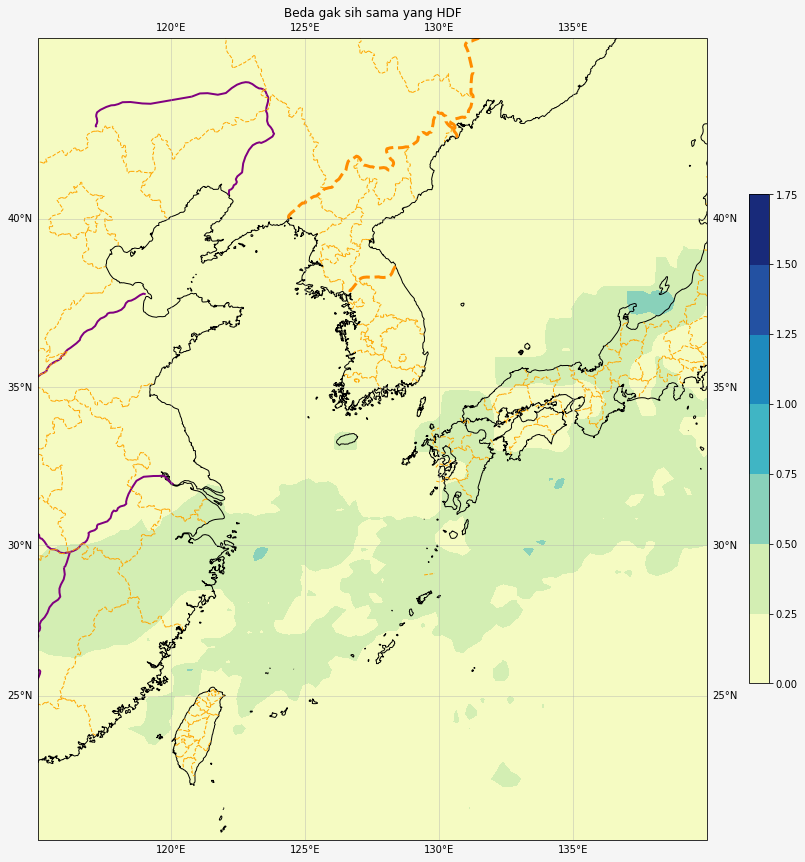

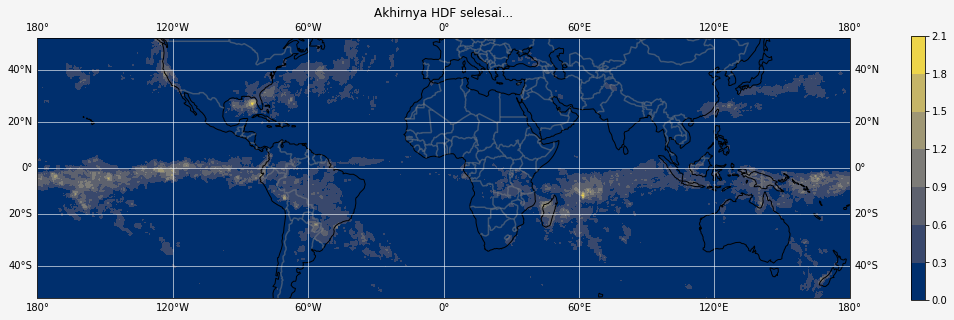

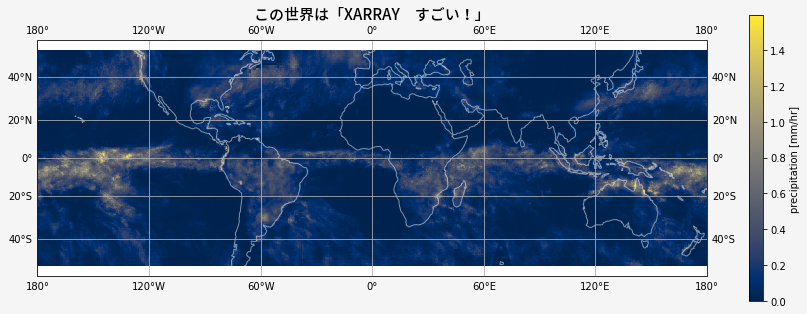